We run a preorder depth-first search (DFS) on the root of a binary tree.

At each node in this traversal, we output D dashes (where D is the depth of this node), then we output the value of this node.  If the depth of a node is D, the depth of its immediate child is D + 1.  The depth of the root node is 0.

If a node has only one child, that child is guaranteed to be the left child.

Given the output traversal of this traversal, recover the tree and return its root.

 

Example 1:

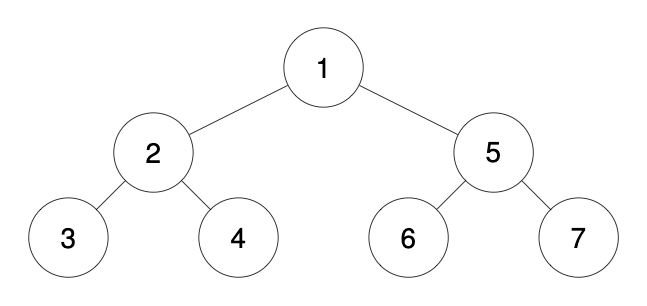

Input: traversal = "1-2--3--4-5--6--7"
Output: [1,2,5,3,4,6,7]

Example 2:

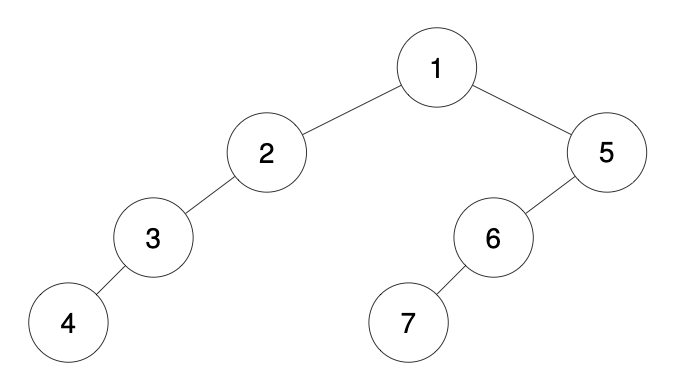

Input: traversal = "1-2--3---4-5--6---7"
Output: [1,2,5,3,null,6,null,4,null,7]

Example 3:

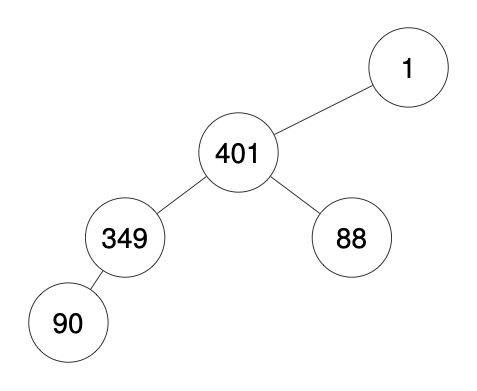

Input: traversal = "1-401--349---90--88"
Output: [1,401,null,349,88,90]

 

Constraints:

    The number of nodes in the original tree is in the range [1, 1000].
    1 <= Node.val <= 109



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def recoverFromPreorder(self, traversal: str) -> Optional[TreeNode]:
        self.pointer = 0
        self.traversal = traversal
        return self.build(0)

    def build(self, curr_depth):
        if self.pointer >= len(self.traversal):
            return None
        depth = len(self.traversal[self.pointer:]) - len(self.traversal[self.pointer:].strip("-"))
        if depth != curr_depth:
            return None
        
        value = self.traversal[self.pointer:].strip("-").split("-")[0]
        self.pointer += depth + len(value)
        node = TreeNode(int(value))
        node.left = self.build(curr_depth + 1)
        node.right = self.build(curr_depth + 1)
        return node

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def recoverFromPreorder(self, traversal: str) -> Optional[TreeNode]:
        self.pointer = 0
        self.traversal = traversal
        return self.build(0)

    def build(self, curr_depth):
        if self.pointer >= len(self.traversal):
            return None
        depth = 0
        while self.traversal[self.pointer + depth] == "-":
            depth += 1
        if depth != curr_depth:
            return None
        
        self.pointer += depth
        value = 0
        while self.pointer < len(self.traversal) and self.traversal[self.pointer] != "-":
            value = value * 10 + int(self.traversal[self.pointer])
            self.pointer += 1
        node = TreeNode(value)
        node.left = self.build(curr_depth + 1)
        node.right = self.build(curr_depth + 1)
        return node

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def recoverFromPreorder(self, traversal: str) -> Optional[TreeNode]:
        pointer = 0
        stack = []
        while pointer < len(traversal):
            depth = 0
            while traversal[pointer] == "-":
                depth += 1
                pointer += 1
            value = 0
            while pointer < len(traversal) and traversal[pointer] != "-":
                value = value * 10 + int(traversal[pointer])
                pointer += 1
            while depth != len(stack):
                stack.pop()
            node = TreeNode(value)
            if stack:
                if not stack[-1].left:
                    stack[-1].left = node
                else:
                    stack[-1].right = node
            stack.append(node)

        return stack[0]
    